## WeatherPy

In [213]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Base URL for API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [214]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

## Perform API Calls

In [223]:
'''
Makes a call to the API for the current weather data in metric units regarding a specific city and returns the 
response in json format. Also prints out the status of the data processing and whether the api call was successful or not.
'''
def api_call(city):
    query_url = f"{base_url}appid={api_key}&q={city}&units=metric"
    response = requests.get(query_url)
    print('response: ', response)
    
    if (response.status_code != requests.codes.ok):
        print('City not found. Moving to next record.')
        return 0
    
    try:
        response.raise_for_status()
    except requests.exceptions.HTTPError('City not found. Moving to next record.'):
        print('error!!!')
        return 0
    
    try:
        json_data = response.json()
        print('request converted into json')
    except json.JSONDecodeError('The API request is not compatible with json. Moving to next record.'):
        print('json data keys: ', json_data.keys()[:5])
        return 0
    
    return json_data

'''
Returns the relevant data from the given json data.
'''
def fetch_data(data):
    cloudiness = data['clouds']['all']
    country = data['sys']['country']
    unix_date = data['dt']
    translated_date = time.gmtime(unix_date) #intermediate step, do not return
    human_date = f"{translated_date[0]}/{translated_date[1]}/{translated_date[2]}"
    humidity = data['main']['humidity']
    latitude = data['coord']['lat']
    longitude = data['coord']['lon']
    max_temp = data['main']['temp_max']
    wind_speed = data['wind']['speed']
    
    return cloudiness, country, unix_date, human_date, humidity, latitude, longitude, max_temp, wind_speed
    

### NOTE: I did not use the batching method.

In [216]:
print('-----------------------------\nBeginning Data Retrieval\n-----------------------------')

weather_data = {'City':[], 'Cloudiness':[], 'Country':[], 'Unix Date':[], 'Human Date':[], 'Humidity':[], 'Latitude':[], 
                'Longitude':[], 'Max Temp (C)':[], 'Wind Speed':[]}
i = 1

for city in cities:
    print(f'Processing current weather data for {city}. Record {i} of {len(cities)}')
    i = i + 1
    json_data = api_call(city)
    
    if isinstance(json_data, int):
        continue
    else:
        cloudiness, country, unix_date, human_date, humidity, latitude, longitude, max_temp, wind_speed = fetch_data(json_data)
    
    weather_data['City'].append(city)
    weather_data['Cloudiness'].append(cloudiness)
    weather_data['Country'].append(country)
    weather_data['Unix Date'].append(unix_date)
    weather_data['Human Date'].append(human_date)
    weather_data['Humidity'].append(humidity)
    weather_data['Latitude'].append(latitude)
    weather_data['Longitude'].append(longitude)
    weather_data['Max Temp (C)'].append(max_temp)
    weather_data['Wind Speed'].append(wind_speed)
    
print('-----------------------------\nData Retrieval Complete\n-----------------------------')

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing current weather data for kununurra. Record 1 of 610
response:  <Response [200]>
request converted into json
Processing current weather data for gat. Record 2 of 610
response:  <Response [200]>
request converted into json
Processing current weather data for thompson. Record 3 of 610
response:  <Response [200]>
request converted into json
Processing current weather data for ushuaia. Record 4 of 610
response:  <Response [200]>
request converted into json
Processing current weather data for albany. Record 5 of 610
response:  <Response [200]>
request converted into json
Processing current weather data for russell. Record 6 of 610
response:  <Response [200]>
request converted into json
Processing current weather data for shahpur. Record 7 of 610
response:  <Response [200]>
request converted into json
Processing current weather data for tchollire. Record 8 of 610
response:  <Response [200]>
request

## Convert Raw Data to DataFrame

In [217]:
weather_df = pd.DataFrame(weather_data)

In [228]:
weather_df.to_csv(output_data_file)

##  Plotting the Data
### NOTE: I chose latitude to be the y-variable as it determines how north or south you are on Earth's Surface.

### Latitude vs. Temperature Plot

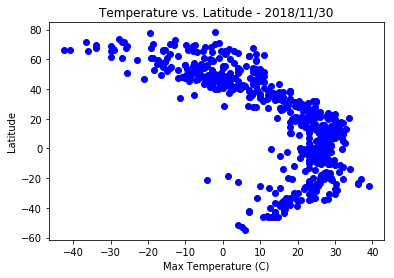

In [219]:
fig, axes = plt.subplots()
axes.scatter(weather_df['Max Temp (C)'], weather_df['Latitude'], marker='o', color='b')
axes.set(title="Temperature vs. Latitude - {}".format(weather_df['Human Date'][0]), xlabel='Max Temperature (C)', ylabel='Latitude')
plt.savefig('Latitude_Temperature_Plot.png')   # save the figure to file
plt.show()
plt.close(fig)


### Latitude vs. Humidity Plot

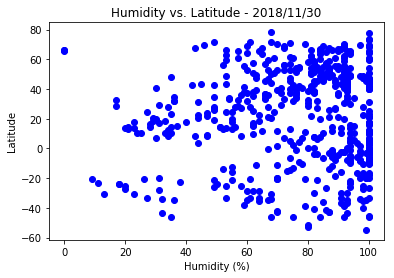

In [220]:
fig, axes = plt.subplots()
axes.scatter(weather_df['Humidity'], weather_df['Latitude'], marker='o', color='b')
axes.set(title="Humidity vs. Latitude - {}".format(weather_df['Human Date'][0]), xlabel='Humidity (%)', ylabel='Latitude')
plt.savefig('Latitude_Humidity_Plot.png')
plt.show()
plt.close(fig)

### Latitude vs. Cloudiness Plot

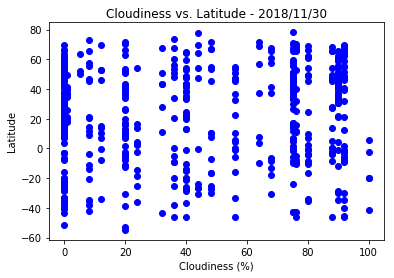

In [221]:
fig, axes = plt.subplots()
axes.scatter(weather_df['Cloudiness'], weather_df['Latitude'], marker='o', color='b')
axes.set(title="Cloudiness vs. Latitude - {}".format(weather_df['Human Date'][0]), xlabel='Cloudiness (%)', ylabel='Latitude')
plt.savefig('Latitude_Cloudiness_Plot.png')
plt.show()
plt.close(fig)

### Latitude vs. Wind Speed Plot

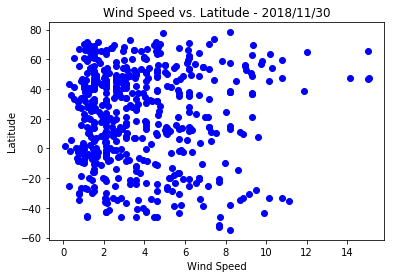

In [222]:
fig, axes = plt.subplots()
axes.scatter(weather_df['Wind Speed'], weather_df['Latitude'], marker='o', color='b')
axes.set(title="Wind Speed vs. Latitude - {}".format(weather_df['Human Date'][0]), xlabel='Wind Speed', ylabel='Latitude')
plt.savefig('Latitude_WindSpeed_Plot.png')
plt.show()
plt.close(fig)